# Comparison between the magnetic field produced by a triaxial ellipsoid and a sphere

### Import the required modules and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from fatiando import gridder, utils
import triaxial_ellipsoid, prolate_ellipsoid
from mesher import TriaxialEllipsoid, ProlateEllipsoid

In [2]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

### Set some parameters for modelling

In [3]:
# The local-geomagnetic field
F, inc, dec = 60000., 50., 20.

# Create a regular grid at z = 0 m
shape = (200, 200)
area = [-5000, 5000, -4000, 6000]
xp, yp, zp = gridder.regular(area, shape, z=0)

### Triaxial ellipsoid versus prolate ellipsoid

This test compares the total-field anomalies produced by a triaxial ellipsoid with that produced by a sphere. The ellipsoid has semi-axes $a$, $b$, and $c$ equal to `501 m`, `500 m`, and `499 m`, respectively, and the sphere has a radius equal to the intermediate semi-axis $b$. Both bodies are centered at the point `(0, 1000, 1100)` and have the same magnetization.

##### Triaxial ellipsoid

In [4]:
triaxial = TriaxialEllipsoid(0, 0, 700, 580, 450.01, 449.99, 45, -10, 34,
                             {'principal susceptibilities': [0.03, 0.02, 0.01],
                              'susceptibility angles': [-20, 20, 9],
                              'remanent magnetization': [0.7, -7, 10]})

In [5]:
magnetization_triaxial = triaxial_ellipsoid.magnetization(triaxial, F, inc, dec, demag=True)

In [6]:
magnetization_triaxial

array([ 1.4980064 ,  0.29431322,  0.41479871])

##### Prolate

In [7]:
prolate = ProlateEllipsoid(0, 0, 700, 580, 450, 45, -10, 34,
                           {'principal susceptibilities': [0.03, 0.02, 0.01],
                            'susceptibility angles': [-20, 20, 9],
                            'remanent magnetization': [0.7, -7, 10]})

In [8]:
magnetization_prolate = prolate_ellipsoid.magnetization(prolate, F, inc, dec, demag=True)

In [9]:
magnetization_prolate

array([ 1.49800641,  0.29431327,  0.41479877])

##### Total-field anomalies

In [10]:
# total-field anomaly produced by the triaxial ellipsoid (in nT)
tf_t = triaxial_ellipsoid.tf(xp, yp, zp, [triaxial],
                             F, inc, dec)

# total-field anomaly produced by the prolate ellipsoid (in nT)
tf_p = prolate_ellipsoid.tf(xp, yp, zp, [prolate],
                            F, inc, dec)

# residuals
tf_r = tf_t - tf_p

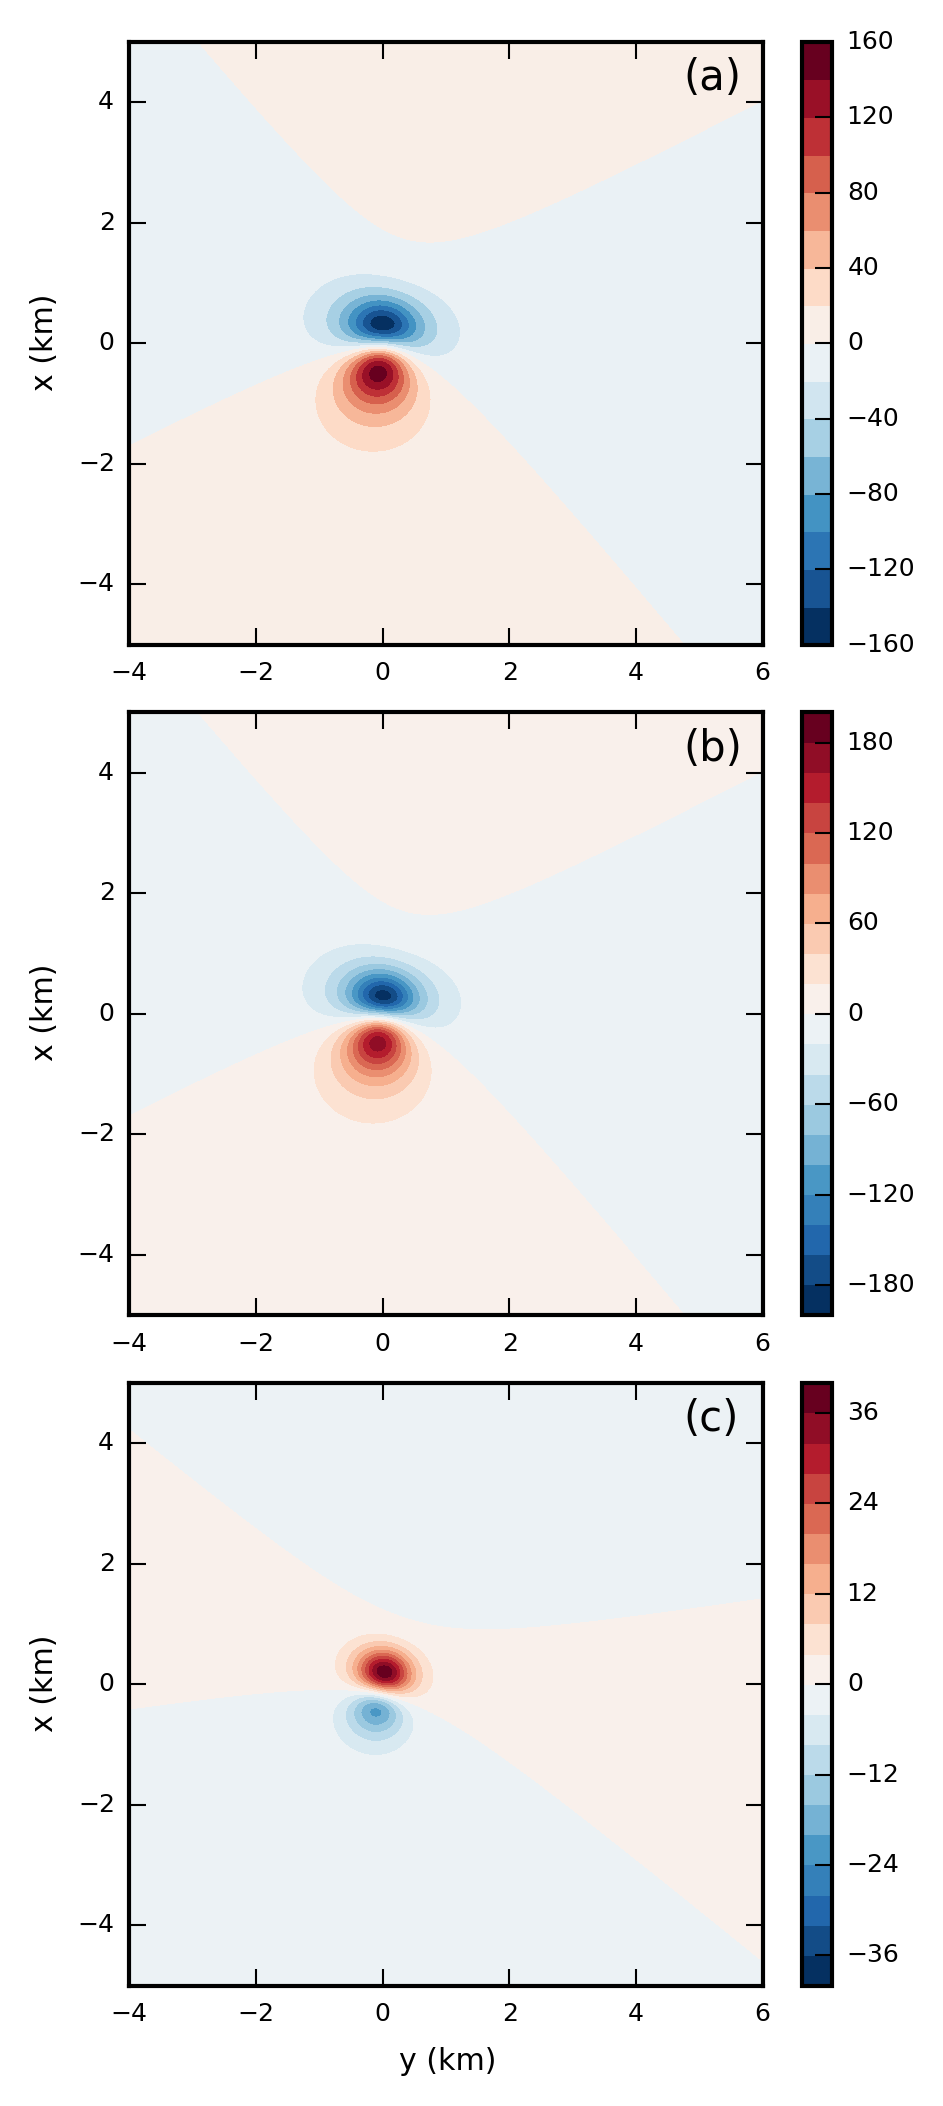

In [11]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

#ranges = np.max(np.abs([np.min(tf_t), np.max(tf_t),
#                        np.min(tf_p), np.max(tf_p)]))
ranges = np.max(np.abs([np.min(tf_t), np.max(tf_t)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(tf_p), np.max(tf_p)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_p.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(tf_r), np.max(tf_r)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_r.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()

plt.show()

##### Field components

In [12]:
# field components produced by the triaxial ellipsoid (in nT)
bx_t = triaxial_ellipsoid.bx(xp, yp, zp, [triaxial],
                             F, inc, dec)
by_t = triaxial_ellipsoid.by(xp, yp, zp, [triaxial],
                             F, inc, dec)
bz_t = triaxial_ellipsoid.bz(xp, yp, zp, [triaxial],
                             F, inc, dec)

bt = [bx_t, by_t, bz_t]

# field components produced by the prolate ellipsoid (in nT)
bx_p = prolate_ellipsoid.bx(xp, yp, zp, [prolate],
                            F, inc, dec)
by_p = prolate_ellipsoid.by(xp, yp, zp, [prolate],
                            F, inc, dec)
bz_p = prolate_ellipsoid.bz(xp, yp, zp, [prolate],
                            F, inc, dec)

bp = [bx_p, by_p, bz_p]

# residuals
bx_r = bx_t - bx_p
by_r = by_t - by_p
bz_r = bz_t - bz_p

br = [bx_r, by_r, bz_r]

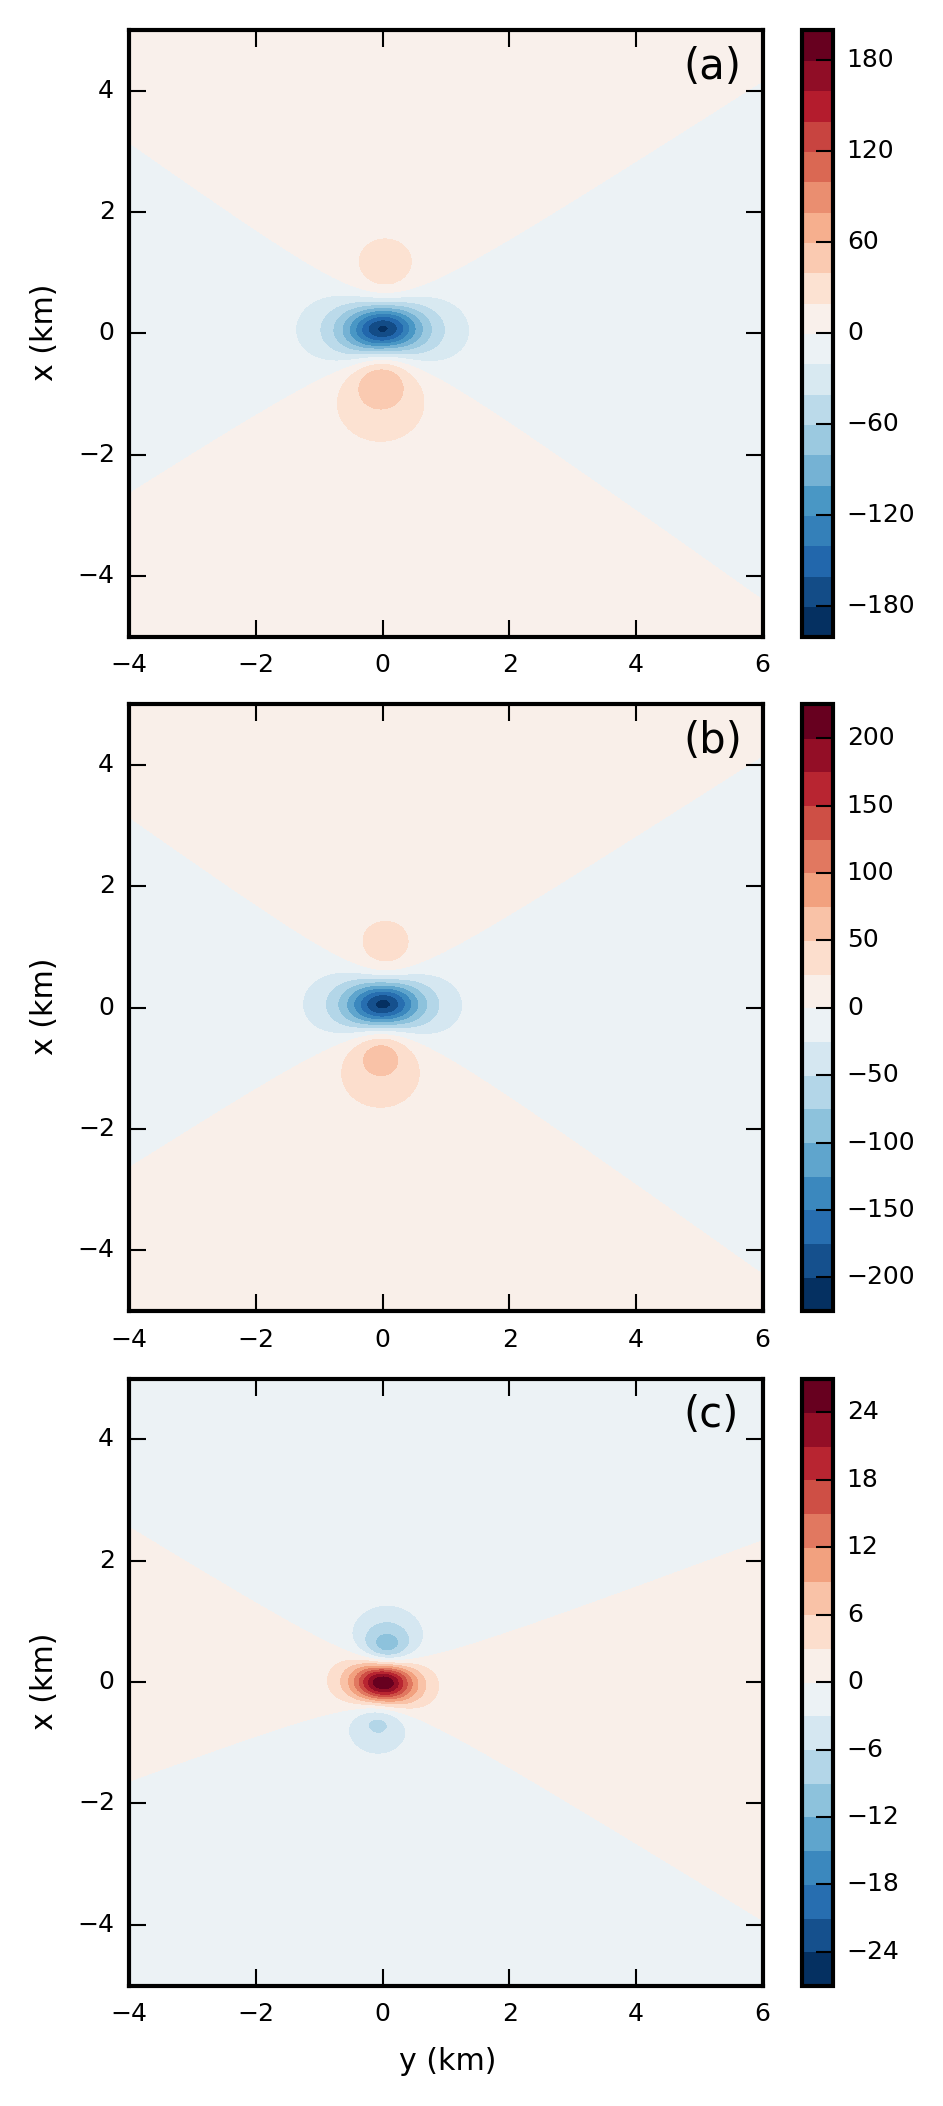

In [13]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

#ranges = np.max(np.abs([np.min(bx_t), np.max(bx_t),
#                        np.min(bx_p), np.max(bx_p)]))
ranges = np.max(np.abs([np.min(bx_t), np.max(bx_t)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(bx_p), np.max(bx_p)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_p.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(bx_r), np.max(bx_r)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_r.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()

plt.show()

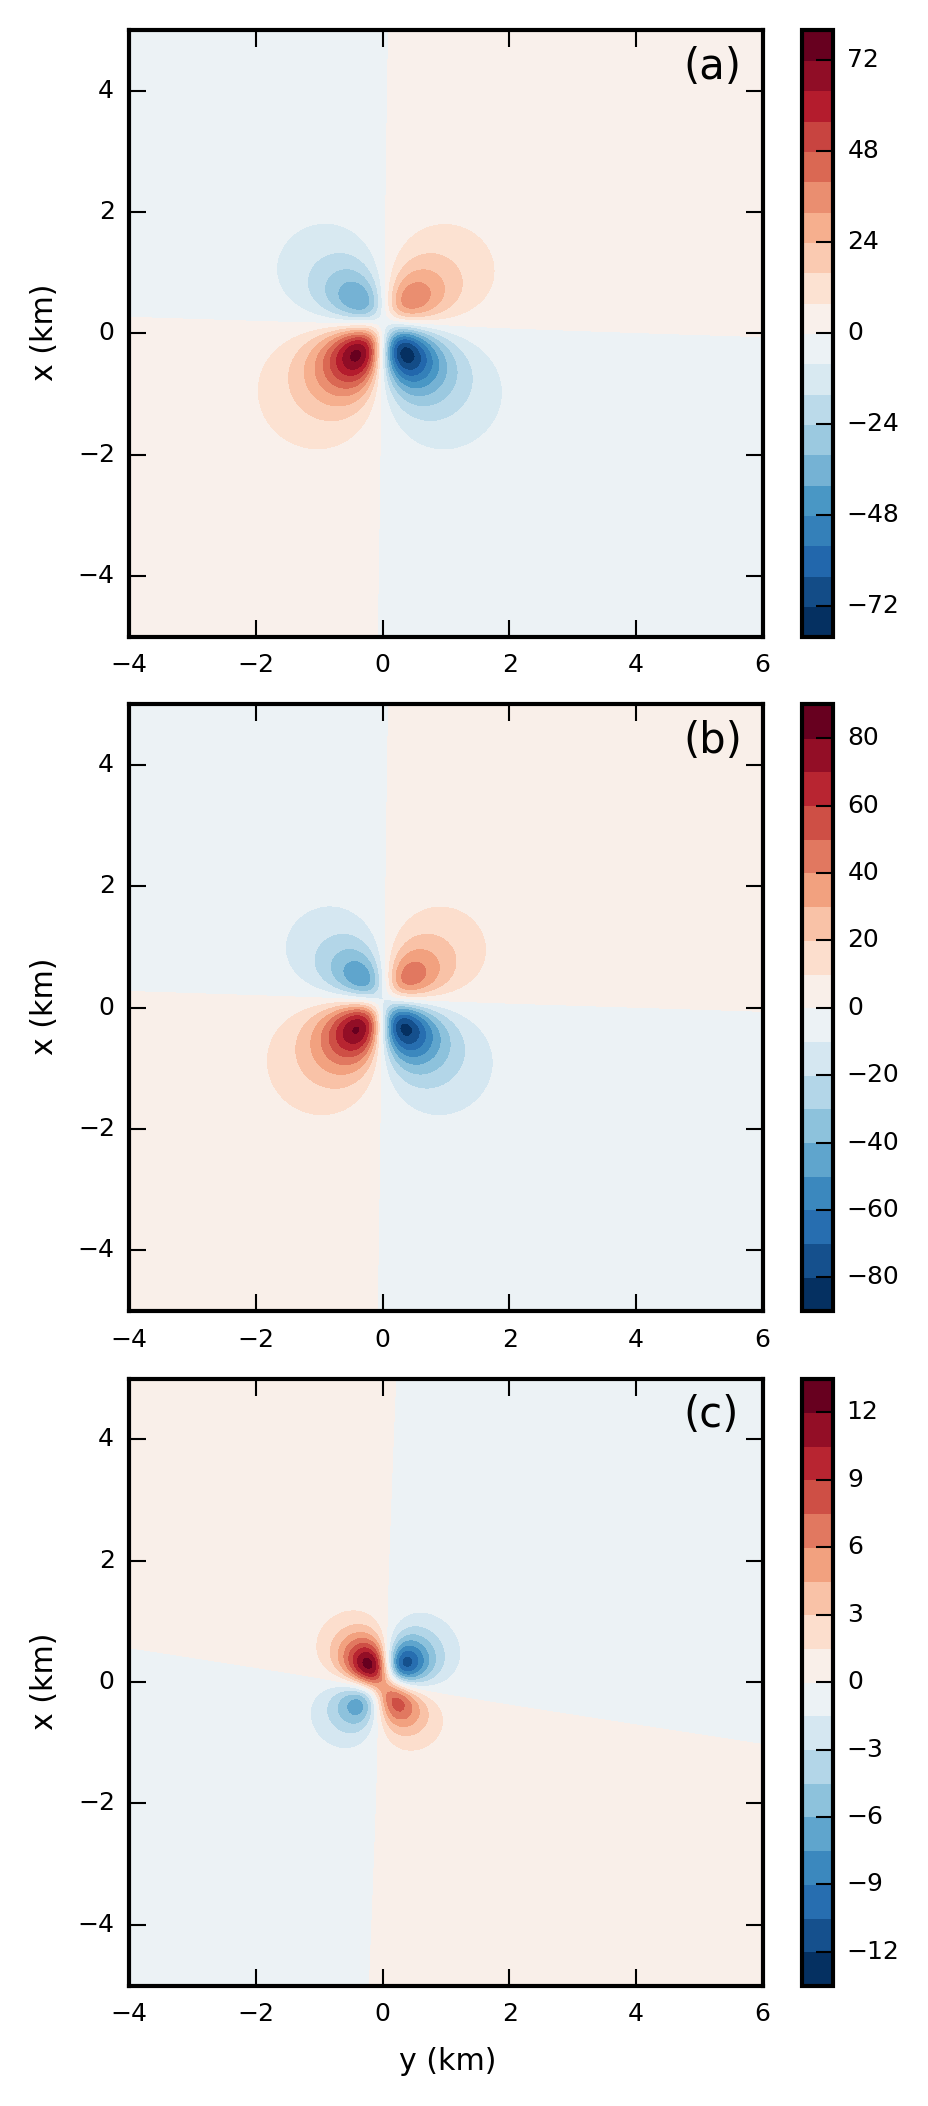

In [14]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

#ranges = np.max(np.abs([np.min(by_t), np.max(by_t),
#                        np.min(by_p, np.max(by_p)]))
ranges = np.max(np.abs([np.min(by_t), np.max(by_t)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(by_p), np.max(by_p)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_p.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(by_r), np.max(by_r)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_r.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()

plt.show()

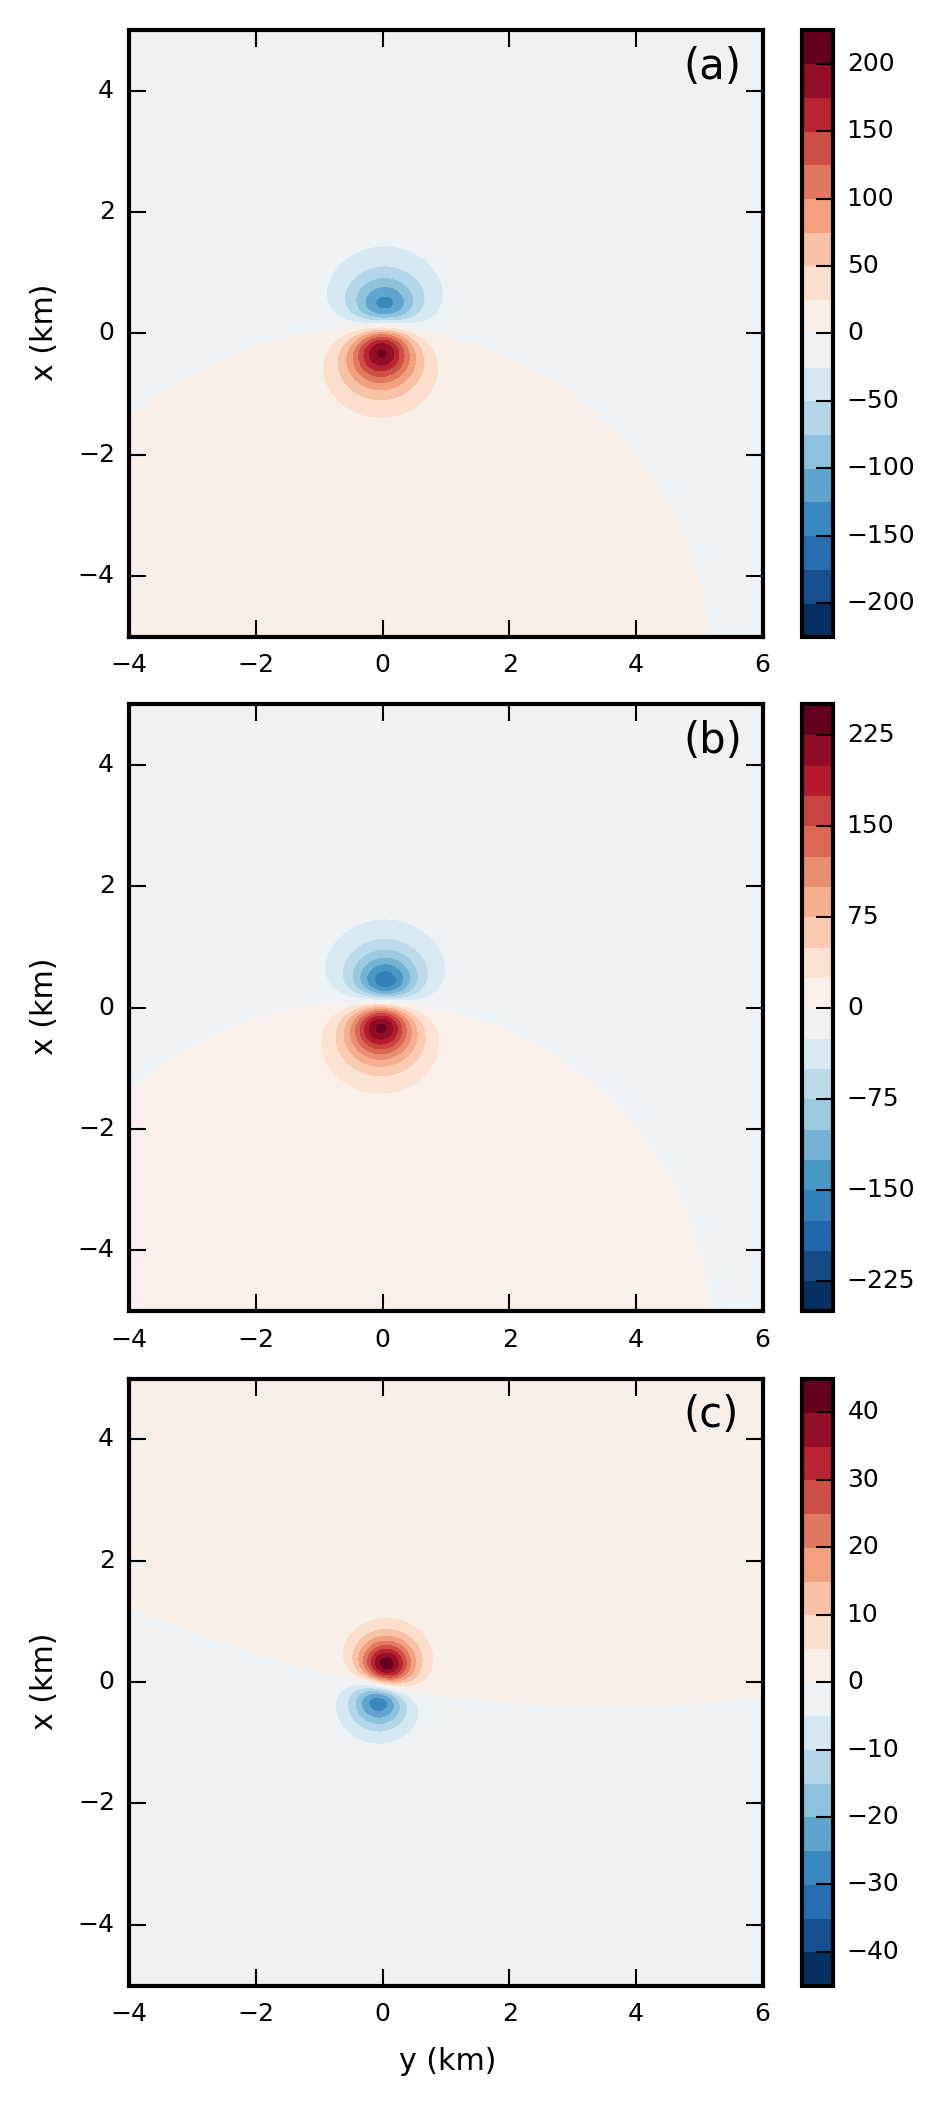

In [15]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

#ranges = np.max(np.abs([np.min(bz_t), np.max(bz_t),
#                        np.min(bz_p), np.max(bz_p)]))
ranges = np.max(np.abs([np.min(bz_t), np.max(bz_t)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(bz_p), np.max(bz_p)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_p.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(bz_r), np.max(bz_r)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_r.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()

plt.show()